In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['mathtext.it'] = 'sans serif'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"

In [2]:
def e_1(d, beta, c):
    return 0.5*((d*np.sin(beta) - c)/(1 - np.sin(beta)))


def e_2(D, beta, c):
    return 0.5*(D*np.sin(beta) - c)


def S_a(z):
    return np.pi*(d + 2*z)*(l_gr - a - z)


def S_b(z):
    if z > z_1:
        return 0
    else:
        return n*(beta - fi_1(z))*(d + 2*z)*a


def fi_1(z):
    return np.arcsin((c + 2*z)/(d + 2*z))


def S_c(z):
    if z >= 0 and z <= z_1:
        return 2*n*a*b1(z)
    elif z_1 < z and z <= z_2:
        return 2*n*a*b2(z)
    elif z > z_2:
        return 0


def b1(z):
    return 0.5*(np.sqrt(D**2 - (c + 2*z)**2) - np.sqrt((d + 2*z)**2 - (c + 2*z)**2))


def b2(z):
    return 0.5*(np.sqrt(D**2 - (c + z*2)**2) - (c + 2*z)*np.tan(beta)**(-1))


def S_d(z):
    return np.pi/4*(D**2 - (d + 2*z)**2)


def S(z):
    return S_a(z) + S_b(z) + S_c(z) + S_d(z)

In [3]:
delta = 1750
omega = 100
a = 0.45
c = 0.01
D = 0.24
d = 0.06
z_0 = 0.09
n = 4

beta = np.pi/n
F = np.pi*(D**2)/4
c_ = c/D
d_ = d/D
a_ = 0.3

epsilon_f = 1 - d_**2
f_cut = (n/math.pi) * (c_*np.sqrt(1 - c_**2) - c_*np.sqrt(d_ **
                                                          2 - c_**2) + np.arcsin(c_) - d_**2 * np.arcsin(c_/d_))
epsilon_w = epsilon_f - a_*f_cut
F_cut = F*f_cut

# длина заряда
l_gr = omega/(delta * epsilon_w * F)

e1 = e_1(d, beta, c)
e2 = e_2(D, beta, c)

z_1 = 0.5*(d*np.sin(beta)-c)/(1-np.sin(beta))
z_2 = (D*np.sin(beta)-c)/2

In [4]:
z = np.linspace(0, z_0, 100)
sa = np.array([S_a(zx) for zx in z ])
sb = np.array([S_b(zx) for zx in z ])
sc = np.array([S_c(zx) for zx in z ])
sd = np.array([S_d(zx) for zx in z ])
s = np.array([S(zx) for zx in z ])

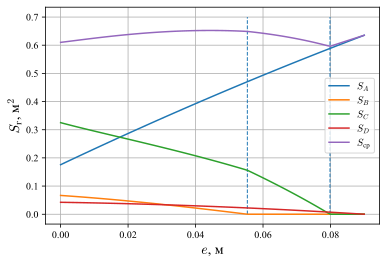

In [5]:
fig = plt.figure()
#plt.ylim([0, 0.7])
plt.plot(z, sa, label='$S_A$')
plt.plot(z, sb, label='$S_B$')
plt.plot(z, sc, label='$S_C$')
plt.plot(z, sd, label='$S_D$')
plt.plot(z, s, label=r'$S_{\mathrm{ср}}$')
#plt.hlines(s.mean(), xmin=0, xmax=z_0, linestyle='--', linewidth=1)
plt.vlines(z_1, ymin=0, ymax=0.7, linestyle='--', linewidth=1)
plt.vlines(z_2, ymin=0, ymax=0.7, linestyle='--', linewidth=1)

plt.xlabel(r'$e$, м', fontsize =14)
plt.ylabel(r'$S_{\mathrm{г}}$, м$^2$', fontsize =14)
#plt.xlim(0, z_0)
#plt.ylim(0, 0.7)
plt.legend(loc='best')
plt.grid()
plt.show()

In [6]:
delta =1683
omega = 881.6 
a_ = 0.3
c_ = 0.05
z_0_ = 0.533
n = 4
D_n = 610/1e3
B_bn = 0.98472
B_n = 0.9873
D = np.around(B_bn*B_n*D_n, decimals=4)
z_0 = np.around(z_0_*D/2, decimals=3) #90/1e3
d = D - 2*z_0
c = c_*D
beta = np.pi/n
F = np.pi*(D**2)/4


d_ = 1 - z_0_
epsilon_f = 1 - d_**2
f_cut = (n/math.pi) * (c_*np.sqrt(1 - c_**2) - c_*np.sqrt(d_**2 - c_**2) + np.arcsin(c_) - d_**2 * np.arcsin(c_/d_))
epsilon_w = epsilon_f - a_*f_cut
F_cut = F*f_cut

#длина заряда
l_gr = omega/(delta * epsilon_w * F)
a = a_*l_gr

e1 = e_1(d, beta, c)
e2 = e_2(D, beta, c)
e = 0.5*(D - d)

z_1 = 0.5*(d*np.sin(beta)-c)/(1-np.sin(beta))
z_2 = (D*np.sin(beta)-c)/2
